In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat
import array_to_latex as atl

In [2]:
plt.rc ('font', size = 10) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 10) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 10) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 10) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 10) #Schriftgröße der Legende

In [3]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

FitFunktionen

In [4]:
def gaus1fit(von,bis,path,m=1,mmin=0,mmax=2,s=0.2,smax=1000,scale=1e-9,override=False): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus = lmfit.models.GaussianModel()  
    pars_gaus=model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["center"].set(value=m,min=mmin,max=mmax)
        pars_gaus["sigma"].set(value=1,min=0)
        pars_gaus["amplitude"].set(value=1,min=0)


    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())


    return np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])




def gaus2fit(von,bis,path,override=False,m1=1,s1=1,scale1=1,m2=1,s2=1,scale2=1,m1min=1,m1max=1,m2min=1,m2max=1): 
    vonarr = pos(von)
    bisarr = pos(bis)

    model_gaus=lmfit.models.GaussianModel(prefix="g1_")+lmfit.models.GaussianModel(prefix="g2_")

    def guess(data,x):
        params_g1=lmfit.models.GaussianModel(prefix="g1_").guess(data,x)
        params=model_gaus.make_params()
        for i in params_g1:
            params[i]=params_g1[i]
                    
        params["g2_center"].value=params.get("g1_center").value-1
        params["g2_sigma"].value=params.get("g1_sigma").value*0.5
        params["g2_amplitude"].value=params.get("g1_amplitude").value*0.3
        return params

    model_gaus.guess=guess
    pars_gaus = model_gaus.guess(data=data[1,vonarr:bisarr],x=data[0,vonarr:bisarr])
    if override:
        #pars_gaus = model_gaus.make_params()
        pars_gaus["g1_center"].set(value=m1,min=m1min,max=m1max)
        pars_gaus["g1_sigma"].set(value=s1)
        pars_gaus["g1_amplitude"].set(value=scale1)
        pars_gaus["g2_center"].set(value=m2,min=m2min,max=m2max)
        pars_gaus["g2_sigma"].set(value=s2)
        pars_gaus["g2_amplitude"].set(value=scale2)


    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")
    

    plt.grid()
    plt.legend()
    plt.savefig('Results/'+str(path)+'.pdf')

    print(out_gaus.fit_report())

    return np.array([np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01))])

Daten einlesen und Standartfehler as Fehler der Counts festlegen

In [5]:

with open('Data/Restgas_3.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = 1e-10#(data[1,i])*0.3
data = np.vstack([data,err])

v = pos(10)
b = pos(60)

fig = plt.figure(figsize=(25,5),dpi=80,linewidth=50)
plt.errorbar(data[0,v:b],data[1,v:b],yerr=data[2,v:b],label = 'Data')
#plt.vlines(18.6,0,10e-9)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Restgas_3.csv'

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 35
    # variables        = 3
    chi-square         = 37.1554123
    reduced chi-square = 1.16110663
    Akaike info crit   = 8.09164851
    Bayesian info crit = 12.7576927
[[Variables]]
    amplitude:  1.7886e-10 +/- 1.6583e-11 (9.27%) (init = 4.837486e-10)
    center:     12.2364666 +/- 0.01772971 (0.14%) (init = 12.23111)
    sigma:      0.17250079 +/- 0.01977388 (11.46%) (init = 0.24)
    fwhm:       0.40620830 +/- 0.04656393 (11.46%) == '2.3548200*sigma'
    height:     4.1366e-10 +/- 3.4920e-11 (8.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.687
    C(center, sigma)     = 0.217
    C(amplitude, center) = 0.183


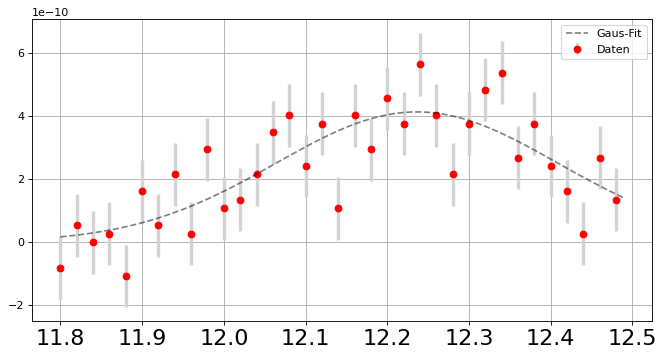

In [ ]:
p12 = gaus1fit(11.8,12.5,'Restgas_3_12.2')



[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 55
    # variables        = 3
    chi-square         = 54.9245807
    reduced chi-square = 1.05624194
    Akaike info crit   = 5.92452895
    Bayesian info crit = 11.9465285
[[Variables]]
    amplitude:  3.1049e-10 +/- 1.4519e-11 (4.68%) (init = 6.385478e-10)
    center:     14.2092266 +/- 0.00967276 (0.07%) (init = 14.2075)
    sigma:      0.18091361 +/- 0.00995780 (5.50%) (init = 0.24)
    fwhm:       0.42601900 +/- 0.02344882 (5.50%) == '2.3548200*sigma'
    height:     6.8469e-10 +/- 3.1698e-11 (4.63%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.597


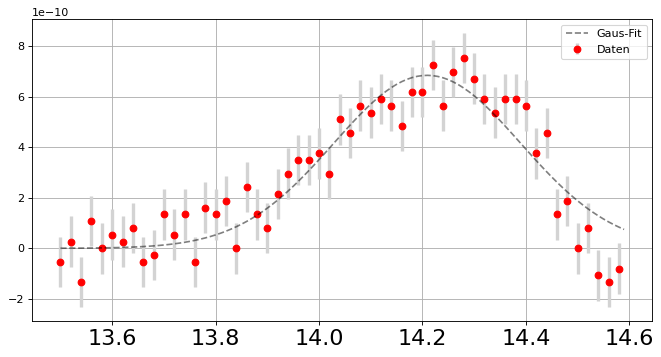

In [ ]:
p14 = gaus1fit(13.5,14.6,'Restgas_3_14.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 37
    # variables        = 3
    chi-square         = 155.410512
    reduced chi-square = 4.57089741
    Akaike info crit   = 59.1006302
    Bayesian info crit = 63.9333839
[[Variables]]
    amplitude:  2.1721e-09 +/- 4.7533e-11 (2.19%) (init = 2.22524e-09)
    center:     16.2281395 +/- 0.00544329 (0.03%) (init = 16.21)
    sigma:      0.23475326 +/- 0.00645148 (2.75%) (init = 0.23)
    fwhm:       0.55280167 +/- 0.01519207 (2.75%) == '2.3548200*sigma'
    height:     3.6913e-09 +/- 6.1210e-11 (1.66%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.797
    C(center, sigma)     = 0.421
    C(amplitude, center) = 0.407


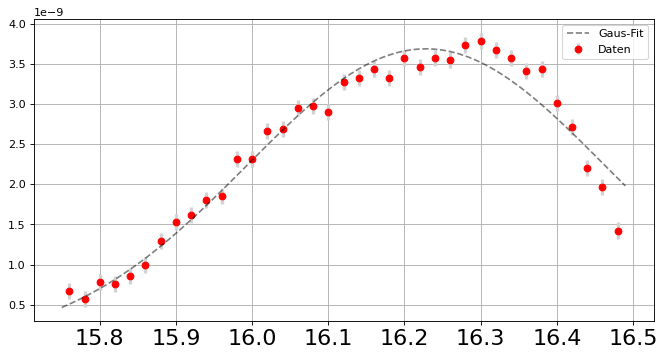

In [ ]:
p16 = gaus1fit(15.75,16.5,'Restgas_3_16.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 50
    # variables        = 3
    chi-square         = 2605.50963
    reduced chi-square = 55.4363751
    Akaike info crit   = 203.668028
    Bayesian info crit = 209.404097
[[Variables]]
    amplitude:  6.8660e-09 +/- 1.7111e-10 (2.49%) (init = 7.324771e-09)
    center:     17.2424645 +/- 0.00668670 (0.04%) (init = 17.21)
    sigma:      0.24110770 +/- 0.00730528 (3.03%) (init = 0.23)
    fwhm:       0.56776524 +/- 0.01720263 (3.03%) == '2.3548200*sigma'
    height:     1.1361e-08 +/- 2.0654e-10 (1.82%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.800
    C(center, sigma)     = 0.507
    C(amplitude, center) = 0.494


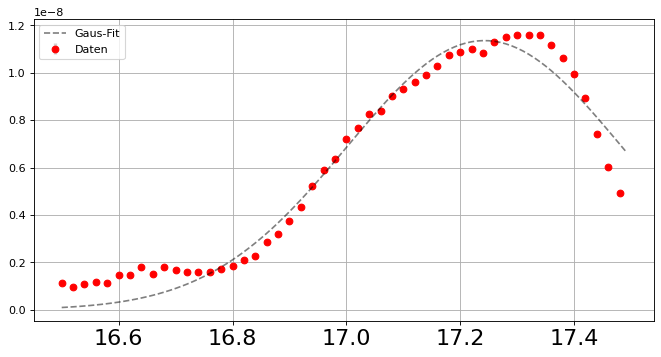

In [ ]:
p17 = gaus1fit(16.5,17.5,'Restgas_3_17.2')

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2052
    # data points      = 59
    # variables        = 6
    chi-square         = 55759.3486
    reduced chi-square = 1052.06318
    Akaike info crit   = 416.224512
    Bayesian info crit = 428.689737
[[Variables]]
    g1_amplitude:  1.6625e-08 +/- 5.8696e-09 (35.31%) (init = 2.533068e-08)
    g1_center:     18.2229768 +/- 0.01001739 (0.05%) (init = 18.21)
    g1_sigma:      0.17767275 +/- 0.02297175 (12.93%) (init = 0.23)
    g2_amplitude:  5.4620e-09 +/- 2.1673e-08 (396.80%) (init = 7.599203e-09)
    g2_center:     17.5000000 +/- 26.5121311 (151.50%) (init = 17.21)
    g2_sigma:      0.42238390 +/- 1.55718821 (368.67%) (init = 0.9)
    g1_fwhm:       0.41838733 +/- 0.05409433 (12.93%) == '2.3548200*g1_sigma'
    g1_height:     3.7329e-08 +/- 8.5575e-09 (22.92%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_fwhm:       

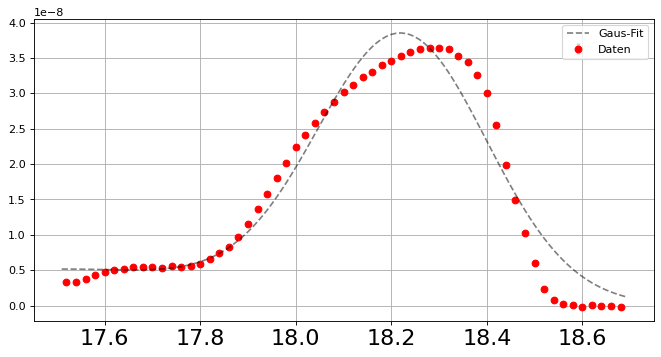

In [ ]:
p18 = gaus2fit(17.51,18.7,'Restgas_3_18.2',override=True,m1=18.21,m1min=18,m1max=18.5,s1=0.23,scale1=2.533068e-08,m2=17.21,m2min=17,m2max=17.5,s2=0.9,scale2=7.599203e-09)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 100
    # variables        = 3
    chi-square         = 1072.30480
    reduced chi-square = 11.0546887
    Akaike info crit   = 243.239545
    Bayesian info crit = 251.055055
[[Variables]]
    amplitude:  1.8972e-09 +/- 4.7956e-11 (2.53%) (init = 2.818642e-09)
    center:     28.1764608 +/- 0.00570963 (0.02%) (init = 28.17)
    sigma:      0.19561697 +/- 0.00570957 (2.92%) (init = 0.23)
    fwhm:       0.46064276 +/- 0.01344500 (2.92%) == '2.3548200*sigma'
    height:     3.8692e-09 +/- 9.7803e-11 (2.53%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


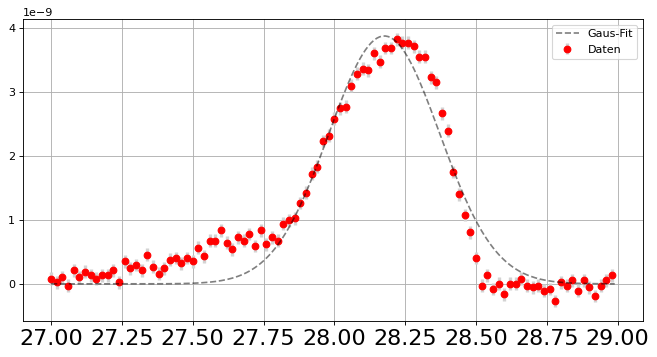

In [ ]:
p28 = gaus1fit(27,29,'Restgas_3_28.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 65
    # variables        = 3
    chi-square         = 128.957085
    reduced chi-square = 2.07995299
    Akaike info crit   = 50.5310064
    Bayesian info crit = 57.0541682
[[Variables]]
    amplitude:  4.6908e-10 +/- 1.9885e-11 (4.24%) (init = 1.048117e-09)
    center:     32.1677789 +/- 0.00874980 (0.03%) (init = 32.1392)
    sigma:      0.17874451 +/- 0.00875017 (4.90%) (init = 0.25)
    fwhm:       0.42091115 +/- 0.02060508 (4.90%) == '2.3548200*sigma'
    height:     1.0469e-09 +/- 4.4382e-11 (4.24%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


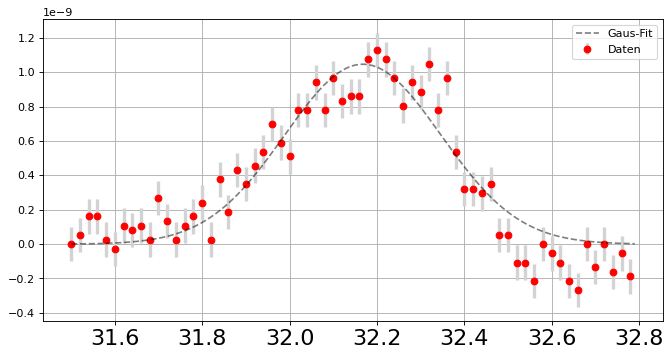

In [ ]:
p32 = gaus1fit(31.5,32.8,'Restgas_3_32.2')

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 100
    # variables        = 3
    chi-square         = 267.944520
    reduced chi-square = 2.76231464
    Akaike info crit   = 104.560976
    Bayesian info crit = 112.376486
[[Variables]]
    amplitude:  6.1454e-10 +/- 2.4211e-11 (3.94%) (init = 1.148898e-09)
    center:     44.1480695 +/- 0.00907704 (0.02%) (init = 44.15)
    sigma:      0.19952477 +/- 0.00907679 (4.55%) (init = 0.25)
    fwhm:       0.46984492 +/- 0.02137420 (4.55%) == '2.3548200*sigma'
    height:     1.2288e-09 +/- 4.8409e-11 (3.94%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


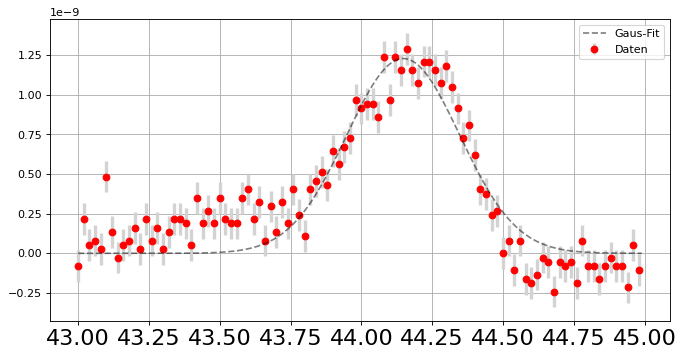

In [ ]:
p44 = gaus1fit(43,45,'Restgas_3_44.2')

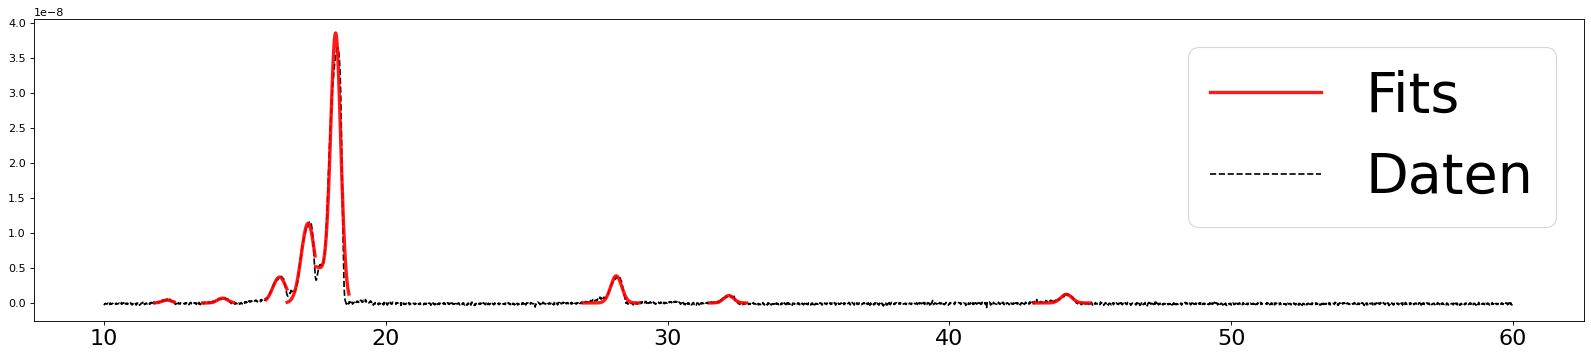

In [ ]:
fig = plt.figure(figsize=(25,5),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],zorder=5,mfc='black',color='k',linestyle='--',label='Daten')
plt.plot(p12[0],p12[1],zorder=10,label='Fits',color='r',alpha=0.9,linewidth=3)
plt.plot(p14[0],p14[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p16[0],p16[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p17[0],p17[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p18[0],p18[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p28[0],p28[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p32[0],p32[1],zorder=10,color='r',alpha=0.9,linewidth=3)
plt.plot(p44[0],p44[1],zorder=10,color='r',alpha=0.9,linewidth=3)


plt.legend(fontsize=50)